In [2]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype 버전에 맞게 다운 아나콘다 프롬프트에서 pip install 파일경로\파일이름 후에 pip install konlpy

그 전에 자바 홈 확인 환경변수에서

In [5]:
a=kolaw.open('constitution.txt').read()
print(a[:100])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의


In [6]:
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [7]:
b=kobill.open('1809890.txt').read()
print(b[:100])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이


형태소 분석기 만들기 변수 선언

In [8]:
from konlpy.tag import *
hannanum=Hannanum()
kkma=Kkma()
komoran=Komoran()
okt=Okt()

- nouns: 명사 추출
- morphs: 형태소 추출
- pos : 형태소를 추출하여 품사 태그 부착

In [10]:
hannanum.nouns(a[:40])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']

In [11]:
kkma.nouns(a[:40])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동']

In [12]:
komoran.nouns(a[:40])

['대한민국', '헌법', '역사', '전통', '국민', '운동']

In [13]:
okt.nouns(a[:40])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']

In [14]:
hannanum.morphs(a[:40])

['대한민국헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛',
 '나는',
 '우리',
 '대한국민',
 '은',
 '3·1운동',
 '으로']

In [15]:
okt.pos(a[:40])

[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대', 'Modifier'),
 ('한', 'Modifier'),
 ('국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('·', 'Punctuation'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa')]

In [16]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [19]:
from nltk import Text
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc, font_manager
font_path='C:/Windows/Fonts/gulim.ttc'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

plt.rcParams['figure.figsize']=(8,6)
# plt.figure(figsize=(6,4))
plt.rcParams['axes.unicode_minus']=False #축의 마이너스 기호를 유니코드로 바꾸지마라


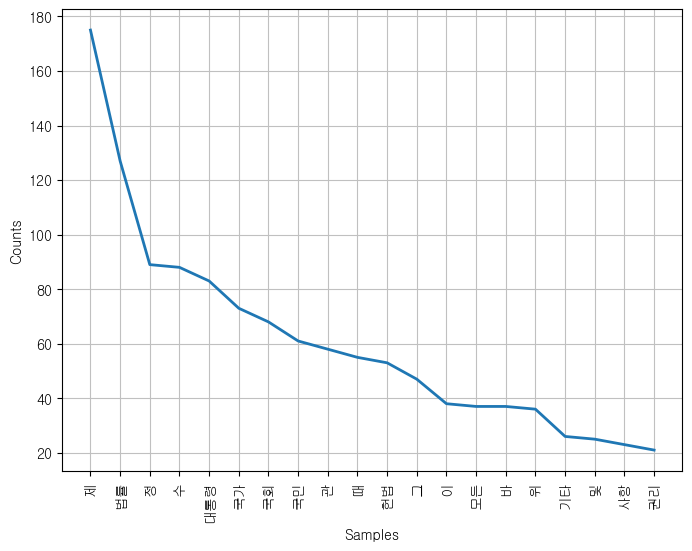

In [25]:
kolaw_fd=Text(okt.nouns(a), name='kolaw')
kolaw_fd.plot(20)
plt.show()

In [28]:
fd=kolaw_fd.vocab()
print(fd.most_common(20))

[('제', 175), ('법률', 127), ('정', 89), ('수', 88), ('대통령', 83), ('국가', 73), ('국회', 68), ('국민', 61), ('관', 58), ('때', 55), ('헌법', 53), ('그', 47), ('이', 38), ('모든', 37), ('바', 37), ('위', 36), ('기타', 26), ('및', 25), ('사항', 23), ('권리', 21)]


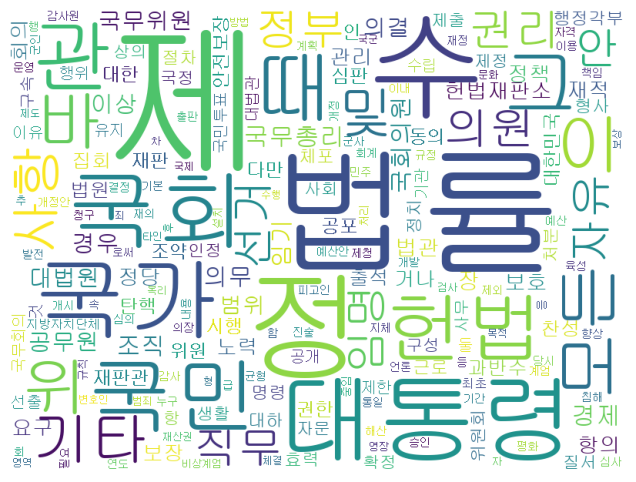

In [29]:
from wordcloud import WordCloud
wc=WordCloud(width=800, height=600, background_color='white', font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw_fd.vocab())) #fd를 써도된다
plt.axis('off')
plt.savefig('data/wordcloud.png') #항상 show 전에 저장
plt.show()

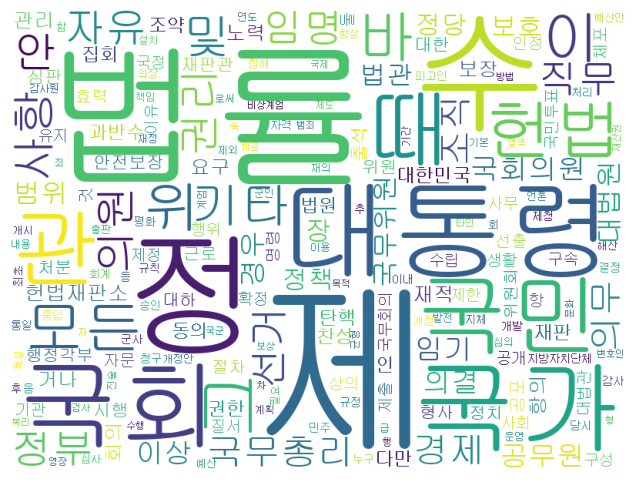

In [30]:
from wordcloud import WordCloud
wc=WordCloud(width=800, height=600, background_color='white', font_path=font_path)
plt.imshow(wc.generate_from_frequencies(fd)) #fd를 써도된다
plt.axis('off')
plt.savefig('data/wordcloud1.png') #항상 show 전에 저장
plt.show()